We will be using pyomnidata to retrieve omni data and plot for the support figures section

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import scienceplots
plt.style.use(['science', 'no-latex'])



In [39]:
def read_data(file_name):
    # Load data from the file (skip header row and assume space/tab delimited)
    data = np.loadtxt(file_name, skiprows=1)

    # Replace all entries that are placeholder values (99999.9, 9999.9, etc.) with np.nan
    data[data == 999.99] = np.nan  
    data[data == 99999.9] = np.nan  
    data[data == 9999.99] = np.nan  

    # Extract individual columns
    year = data[:, 0]
    doy = data[:, 1]
    hour = data[:, 2]
    minute = data[:, 3]
    bx = data[:, 4]  # BX (nT, GSE)
    by = data[:, 5]  # BY (nT, GSM)
    bz = data[:, 6]  # BZ (nT, GSM)
    speed = data[:, 7]  # Speed (km/s)
    density = data[:, 8]  # Proton Density (n/cc)

    # Combine into a structured dictionary or tuple
    return year, doy, hour, minute, bx, by, bz, speed, density


In [40]:
# Function to convert year and day of year to datetime
def doy_to_datetime(year, doy, hour, minute):
    # Ensure that the inputs are integers
    year = int(year)  # Explicitly cast year to int
    doy = int(doy)
    hour = int(hour)
    minute = int(minute)

    # January 1st of the given year
    start_date = datetime(year, 1, 1)
    # Add (doy - 1) days to the start_date to get the correct date
    target_date = start_date + timedelta(days=doy - 1)
    # Add the time (hour, minute)
    target_date = target_date.replace(hour=hour, minute=minute)
    return target_date


In [45]:
def plot_data(year, doy, hour, minute, bx, by, bz, speed, density):
    # Convert year, doy, hour, minute to datetime objects
    time = [doy_to_datetime(y, d, h, m) for y, d, h, m in zip(year, doy, hour, minute)]

    # Create a grid for the subplots
    fig = plt.figure(figsize=(8, 5))  # Adjusted figure size since there's only 2 subplots now
    gs = gridspec.GridSpec(1, 2)  # 2 rows, 1 column

    # Plot BxGSE, ByGSM, and BzGSM in the first subplot
    ax1 = fig.add_subplot(gs[0])
    #ax1.plot(time, by, label='ByGSM', color='red')
    ax1.plot(time, bz, label='BzGSM')
    ax1.set_title('Magnetic Field Components')
    ax1.set_xlabel('Time (UTC)')
    ax1.set_ylabel('Field Strength (nT)')
    ax1.axhline(y=0, color='black', linestyle='--')
    ax1.axvline(datetime(2022,12,19,14,5), color='black', linestyle='--',)
    ax1.legend()
    

    # Format the x-axis for better readability
    ax1.xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Set major ticks every hour
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax1.tick_params(axis='x', rotation=45)

    # Plot Speed (Solar Wind) in the second subplot
    ax2 = fig.add_subplot(gs[1])
    ax2.plot(time, speed, label='Speed (km/s)', color='purple')
    ax2.set_title('Solar Wind Speed')
    ax2.set_xlabel('Time (UTC)')
    ax2.set_ylabel('Speed (km/s)')
    ax2.axvline(datetime(2022,12,19,14,5), color='black', linestyle='--',)
    ax2.legend()

    # Format the x-axis for better readability
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Set major ticks every hour
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax2.tick_params(axis='x', rotation=45)

    # Adjust the layout to prevent overlapping labels
    plt.tight_layout()

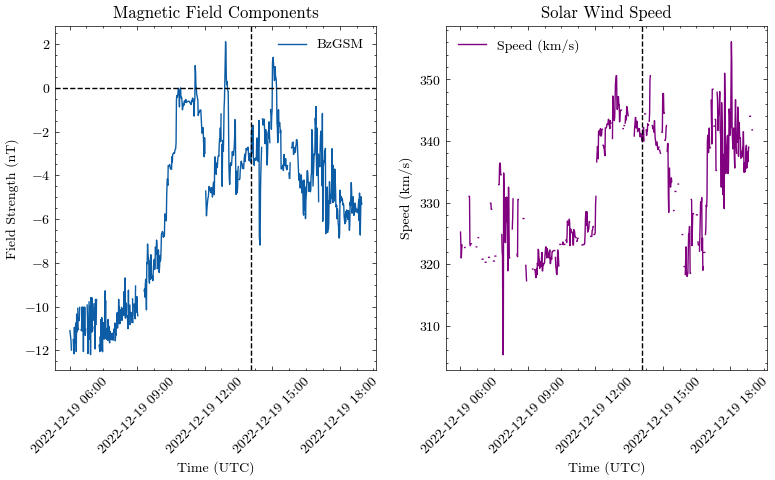

In [46]:
# File path for the data file
file_name = 'omni_min_def_On38ajIjA7.lst'

# Read the data
year, doy, hour, minute, bx, by, bz, speed, density = read_data(file_name)

# Plot the data
plot_data(year, doy, hour, minute, bx, by, bz, speed, density)